In [1]:
# importer les packages
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import numpy as np 
import cufflinks as cf #

In [2]:
debut=dt.datetime(2017,1,1)
fin=dt.datetime(2021,5,24)
tickers=['TSLA']
df=web.DataReader(tickers, 'yahoo', debut,fin)
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2017-01-03,43.397999,43.397999,44.066002,42.192001,42.972000,29616500.0
2017-01-04,45.397999,45.397999,45.599998,42.862000,42.950001,56067500.0
2017-01-05,45.349998,45.349998,45.495998,44.389999,45.284000,29558500.0
2017-01-06,45.801998,45.801998,46.062000,45.090000,45.386002,27639500.0
2017-01-09,46.256001,46.256001,46.383999,45.599998,45.793999,19897500.0


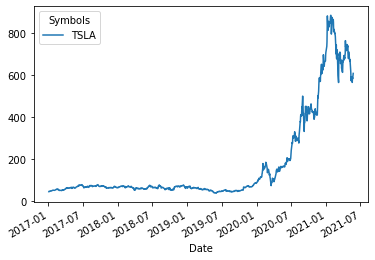

In [3]:
#visualiser les données
df['Close'].plot()


In [6]:
# calcul du rendements et distribution des rendements
rdts=np.log((df['Close']/df['Close'].shift(1)))

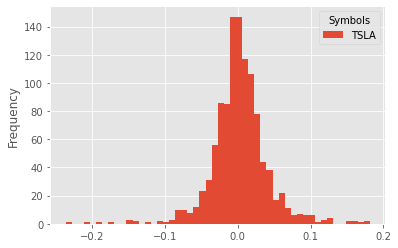

In [7]:
plt.style.use('ggplot')
rdts.plot.hist(bins=50)

In [10]:
cf.set_config_file(offline=True)

In [18]:
rdts.iplot(kind='histogram',subplots=True)

In [19]:
df.normalize().iplot(kind='lines')

Symbols,TSLA
Date,
2020-01-03,0.029203
2020-01-06,0.019072
2020-01-07,0.038067
2020-01-08,0.048033
2020-01-09,-0.022189
...,...
2021-05-13,-0.031339
2021-05-14,0.031085
2021-05-17,-0.022134


# strategie avec les moyennes mobiles



In [22]:
Ml =100
Mc=50
df['Moyenne_courte']=df['Close'].rolling(Mc).mean()
df['Moyenne_long']=df['Close'].rolling(Ml).mean()

In [23]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume,Moyenne_courte,Moyenne_long
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,,
2017-01-03,43.397999,43.397999,44.066002,42.192001,42.972000,29616500.0,NaN,NaN
2017-01-04,45.397999,45.397999,45.599998,42.862000,42.950001,56067500.0,NaN,NaN
2017-01-05,45.349998,45.349998,45.495998,44.389999,45.284000,29558500.0,NaN,NaN
2017-01-06,45.801998,45.801998,46.062000,45.090000,45.386002,27639500.0,NaN,NaN
2017-01-09,46.256001,46.256001,46.383999,45.599998,45.793999,19897500.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600.0,673.711798,724.018098
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400.0,671.509398,723.192899


In [24]:
df.dropna(inplace=True)

In [25]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume,Moyenne_courte,Moyenne_long
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,
Date,,,,,,,,
2017-05-25,63.366001,63.366001,63.394001,61.562000,62.203999,25070000.0,59.772240,54.974420
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.024600,55.190720
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.319000,55.406940
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.635360,55.635460
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.994120,55.858180
...,...,...,...,...,...,...,...,...
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600.0,673.711798,724.018098
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400.0,671.509398,723.192899


In [26]:
df[['Close','Moyenne_courte','Moyenne_long']].normalize().iplot(kind='lines')

In [27]:
# on met un odre si moyenne courte > moyenne longue
df['positions']=np.where(df['Moyenne_courte']>df['Moyenne_long'],1,-1)

In [28]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume,Moyenne_courte,Moyenne_long,positions
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2017-05-25,63.366001,63.366001,63.394001,61.562000,62.203999,25070000.0,59.772240,54.974420,1
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.024600,55.190720,1
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.319000,55.406940,1
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.635360,55.635460,1
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.994120,55.858180,1
...,...,...,...,...,...,...,...,...,...
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600.0,673.711798,724.018098,-1
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400.0,671.509398,723.192899,-1


In [29]:
df[['Close','Moyenne_courte','Moyenne_long','positions']].normalize().iplot()


# Back testing


In [30]:
df['rendements']=np.log((df['Close']/df['Close'].shift(1)))

In [31]:
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume,Moyenne_courte,Moyenne_long,positions,rendements
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2017-05-25,63.366001,63.366001,63.394001,61.562000,62.203999,25070000.0,59.77224,54.97442,1,NaN
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.02460,55.19072,1,0.025890
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.31900,55.40694,1,0.030173
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.63536,55.63546,1,0.017483
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.99412,55.85818,1,-0.001879


In [32]:
df.dropna(inplace=True)

In [33]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume,Moyenne_courte,Moyenne_long,positions,rendements
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.024600,55.190720,1,0.025890
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.319000,55.406940,1,0.030173
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.635360,55.635460,1,0.017483
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.994120,55.858180,1,-0.001879
2017-06-02,67.970001,67.970001,68.575996,67.185997,67.954002,27951000.0,61.333480,56.075320,1,-0.001529
...,...,...,...,...,...,...,...,...,...,...
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600.0,673.711798,724.018098,-1,0.001801
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400.0,671.509398,723.192899,-1,-0.025253


In [34]:
df['strat'] = df['positions'].shift(1)*df['rendements']

In [35]:
df

Attributes,Adj Close,Close,High,Low,Open,Volume,Moyenne_courte,Moyenne_long,positions,rendements,strat
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,
2017-05-26,65.028000,65.028000,65.098000,63.262001,63.456001,39011000.0,60.024600,55.190720,1,0.025890,NaN
2017-05-30,67.019997,67.019997,67.255997,65.152000,65.199997,38914500.0,60.319000,55.406940,1,0.030173,0.030173
2017-05-31,68.202003,68.202003,68.578003,67.031998,67.538002,49817000.0,60.635360,55.635460,1,0.017483,0.017483
2017-06-01,68.073997,68.073997,68.975998,67.458000,68.800003,38040000.0,60.994120,55.858180,1,-0.001879,-0.001879
2017-06-02,67.970001,67.970001,68.575996,67.185997,67.954002,27951000.0,61.333480,56.075320,1,-0.001529,-0.001529
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18,577.869995,577.869995,596.250000,563.380005,568.000000,36830600.0,673.711798,724.018098,-1,0.001801,-0.001801
2021-05-19,563.460022,563.460022,566.210022,546.979980,552.549988,39578400.0,671.509398,723.192899,-1,-0.025253,0.025253


In [36]:
df[['rendements', 'strat']].cumsum().apply(np.exp).iplot()